# 참고문서들

- [Basic Machine Learning with Red Wine Quality data](https://www.kaggle.com/code/madhurisivalenka/basic-machine-learning-with-red-wine-quality-data)

- [Red Wine Quality Classification Analysis + EDA](https://www.kaggle.com/code/tolgahancepel/red-wine-quality-classification-analysis-eda#--6.-Measuring-The-Error-)

- [Red Wine Quality Classification (%95.76 Acc)](https://www.kaggle.com/code/rafetcan/red-wine-quality-classification-95-76-acc)

- [Red Wine Quality Prediction:87% Accuracy using PCA](https://www.kaggle.com/code/sonalisingh1411/red-wine-quality-prediction-87-accuracy-using-pca)

- [Intro to Parameter Tuning in Scikit [Acc :0.9175]](https://www.kaggle.com/code/rajmehra03/intro-to-parameter-tuning-in-scikit-acc-0-9175#RED-WINE-QUALITY.-[Accuracy-::-91.75-%])

- [Red Wine Quality EDA & Classification](https://www.kaggle.com/code/sercanyesiloz/red-wine-quality-eda-classification#Red-Wine-Quality-EDA-&-Classification)

# Global Variables

In [61]:
import easydict
args = easydict.EasyDict()

args.SEED = 42

args.data_path = '/content/data/MyDrive/google_lecture/machine learning/1. Data Preprocessing/samples/data/winequality-red.csv'

args.target_col = 'quality'


# Connect to Google Account

In [2]:
from google.colab import drive
drive.mount('/content/data')

Drive already mounted at /content/data; to attempt to forcibly remount, call drive.mount("/content/data", force_remount=True).


# Import Library

In [3]:
import warnings
warnings.filterwarnings(action='ignore')


## 분석

In [4]:
import numpy as np
import pandas as pd

## 시각화

In [5]:
# 코렙 한글깨짐 방지
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

# 데이터 시각화에 사용할 라이브러리
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

# 브라우저에서 바로 그려지도록
%matplotlib inline
sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")

# 그래프에 retina display 적용
%config InlineBackend.figure_format = 'retina'

# Colab 의 한글 폰트 설정
plt.rc('font', family='NanumBarunGothic')

# 유니코드에서  음수 부호설정
mpl.rc('axes', unicode_minus=False)

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 16 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

# [Data](https://www.kaggle.com/datasets/uciml/red-wine-quality-cortez-et-al-2009)

In [25]:
data = pd.read_csv(args.data_path)
data.shape

(1599, 12)

In [26]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [27]:
data.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


# Split Data

In [59]:
from sklearn.model_selection import train_test_split

In [67]:
train, test = train_test_split(data, test_size=0.25, stratify=data[args.target_col], shuffle=True, random_state=args.SEED)
train.shape, test.shape


((1199, 12), (400, 12))

# Data cleansing

## 데이터 결측치(Missing Value)

In [64]:
train.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [65]:
(train.isnull().sum() / train.shape[0]).round(4).sort_values(ascending=False) # 각 걸럼별 결측치 비율

fixed acidity           0.0
volatile acidity        0.0
citric acid             0.0
residual sugar          0.0
chlorides               0.0
free sulfur dioxide     0.0
total sulfur dioxide    0.0
density                 0.0
pH                      0.0
sulphates               0.0
alcohol                 0.0
quality                 0.0
dtype: float64

## 데이터 중복(Redundancy)

In [68]:
print(f'before: {train.shape} / {test.shape}')
train = train.drop_duplicates()
test = test.drop_duplicates()
print(f'after: {train.shape} / {test.shape}')

before: (1199, 12) / (400, 12)
after: (1060, 12) / (384, 12)


# ModelV0 - Baseline

## Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler, PowerTransformer, RobustScaler, MinMaxScaler, MaxAbsScaler
standard_scaler = StandardScaler()

## Encoding

# EDA

## Statistical Analysis

In [69]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1060 entries, 686 to 1166
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1060 non-null   float64
 1   volatile acidity      1060 non-null   float64
 2   citric acid           1060 non-null   float64
 3   residual sugar        1060 non-null   float64
 4   chlorides             1060 non-null   float64
 5   free sulfur dioxide   1060 non-null   float64
 6   total sulfur dioxide  1060 non-null   float64
 7   density               1060 non-null   float64
 8   pH                    1060 non-null   float64
 9   sulphates             1060 non-null   float64
 10  alcohol               1060 non-null   float64
 11  quality               1060 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 107.7 KB


### Target 데이터

In [70]:
train[args.target_col].unique()

array([5, 6, 7, 4, 3, 8])

In [71]:
from collections import Counter
Counter(train[args.target_col])

Counter({5: 452, 6: 418, 7: 129, 4: 40, 3: 8, 8: 13})

In [ ]:
pd.Categorical(train[args.target_col]).describe()

<Axes: xlabel='quality', ylabel='count'>

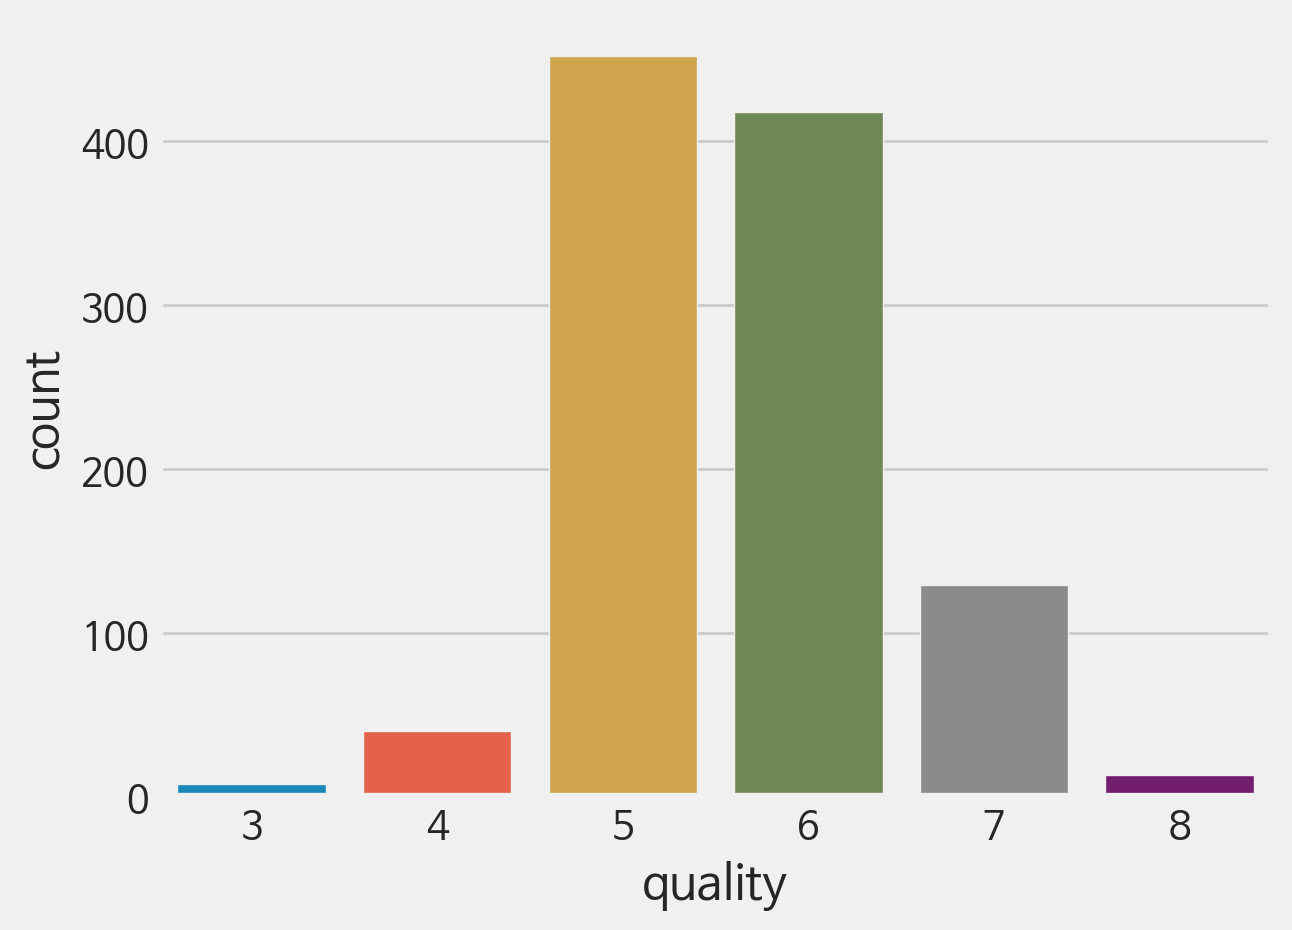

In [72]:
sns.countplot(x=args.target_col, data=train)

### 수치형 데이터

In [73]:
df_number = train.select_dtypes(include=np.number)
df_number.shape

(1060, 12)

In [32]:
df_number.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


#### 상관관계 분석

In [33]:
df_number.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


<Axes: title={'center': 'correlation b/w features'}>

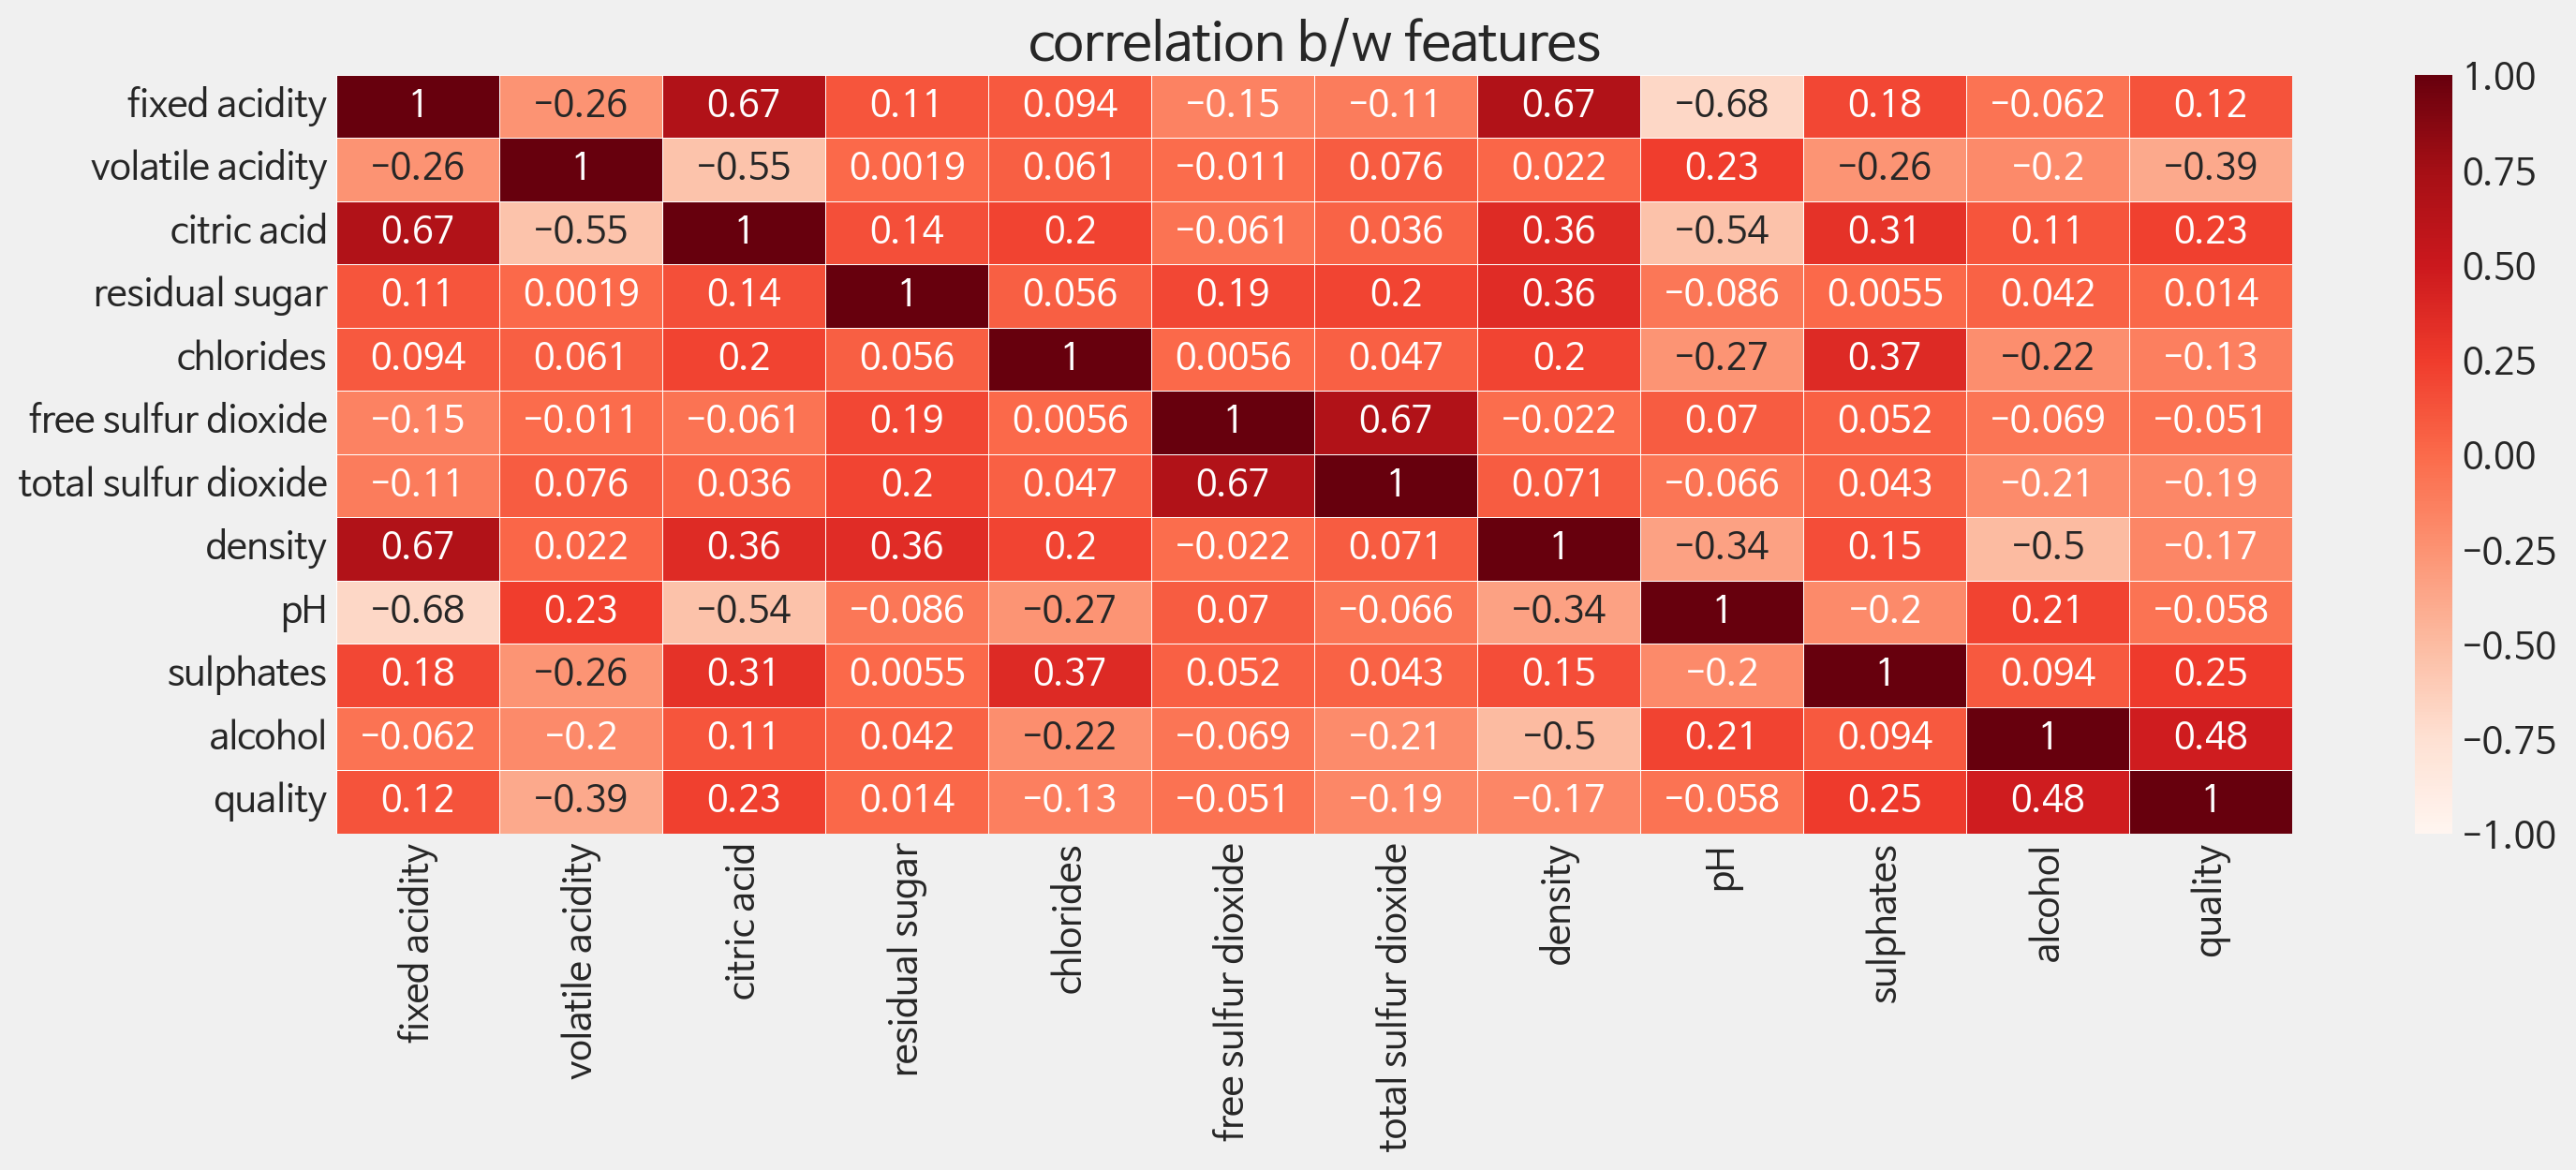

In [35]:
plt.figure(figsize=(15,5))
plt.title('correlation b/w features')
sns.heatmap(df_number.corr(),vmin=-1,vmax=1,annot=True,linewidths=0.2,cmap='Reds')

#### 이상치

<Axes: xlabel='quality', ylabel='chlorides'>

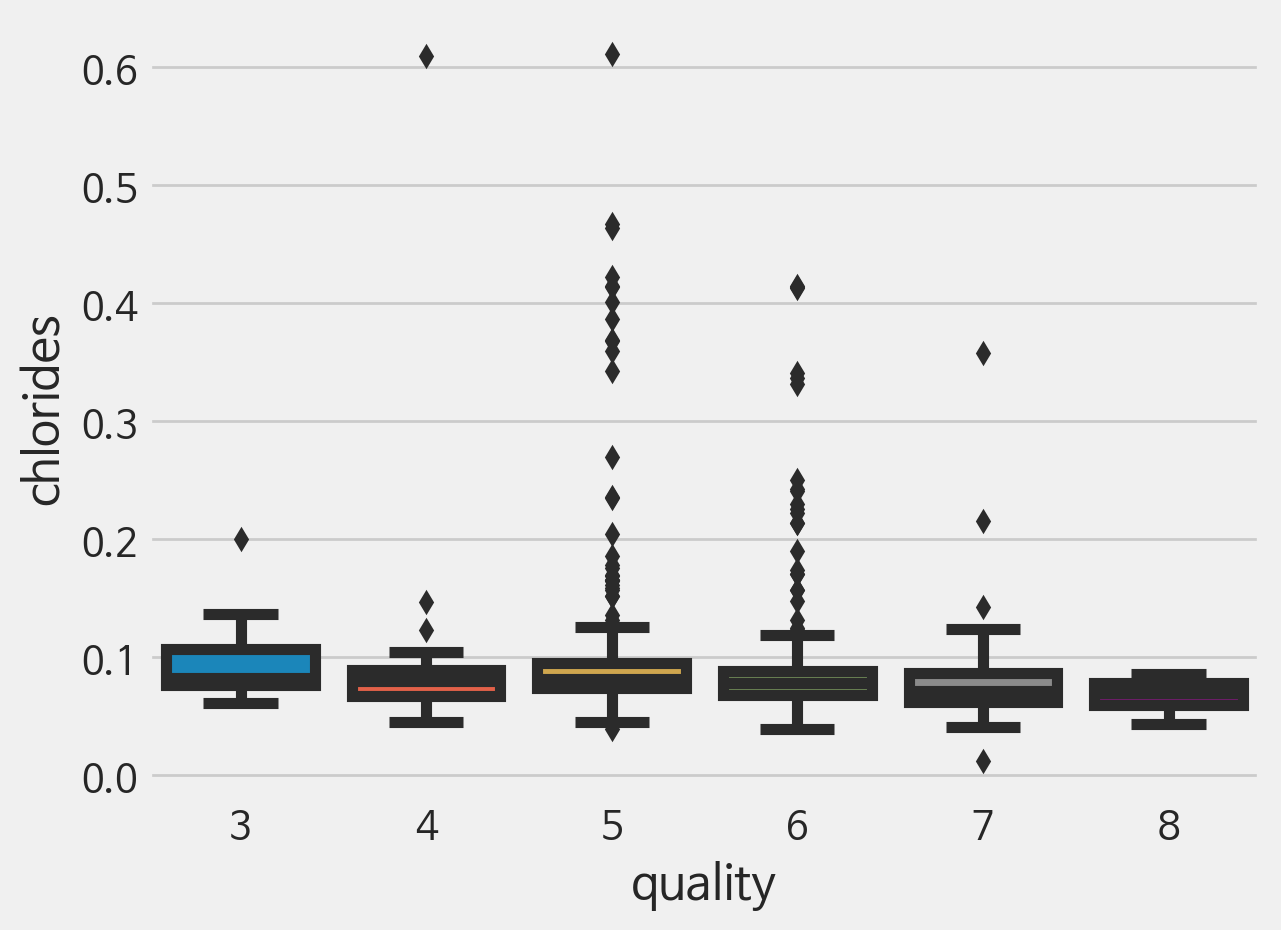

In [74]:
sns.boxplot(data=df_number, x=args.target_col, y='chlorides')

<Axes: xlabel='quality', ylabel='volatile acidity'>

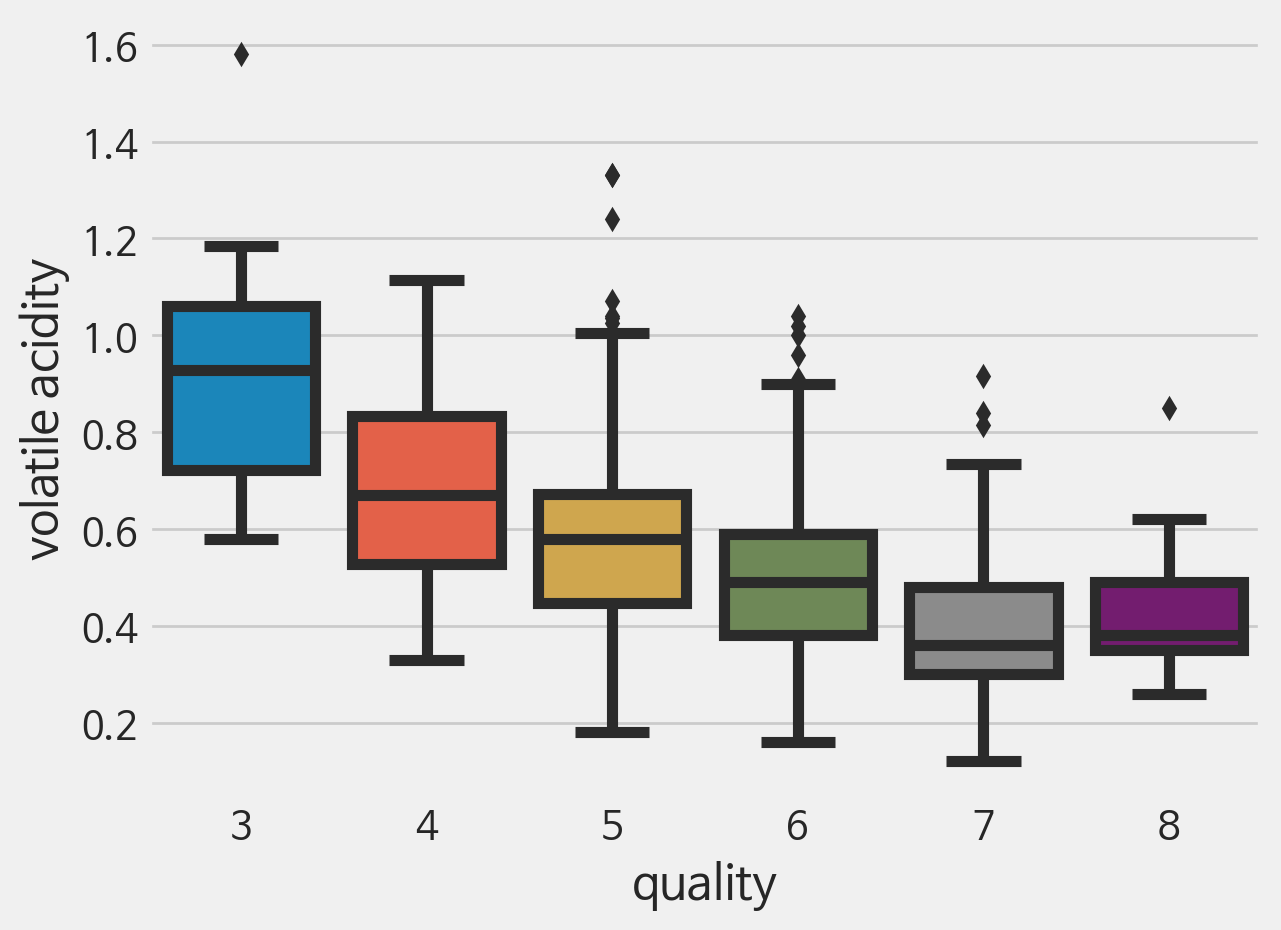

In [75]:
sns.boxplot(data=df_number, x=args.target_col, y='volatile acidity')

<Axes: xlabel='quality', ylabel='alcohol'>

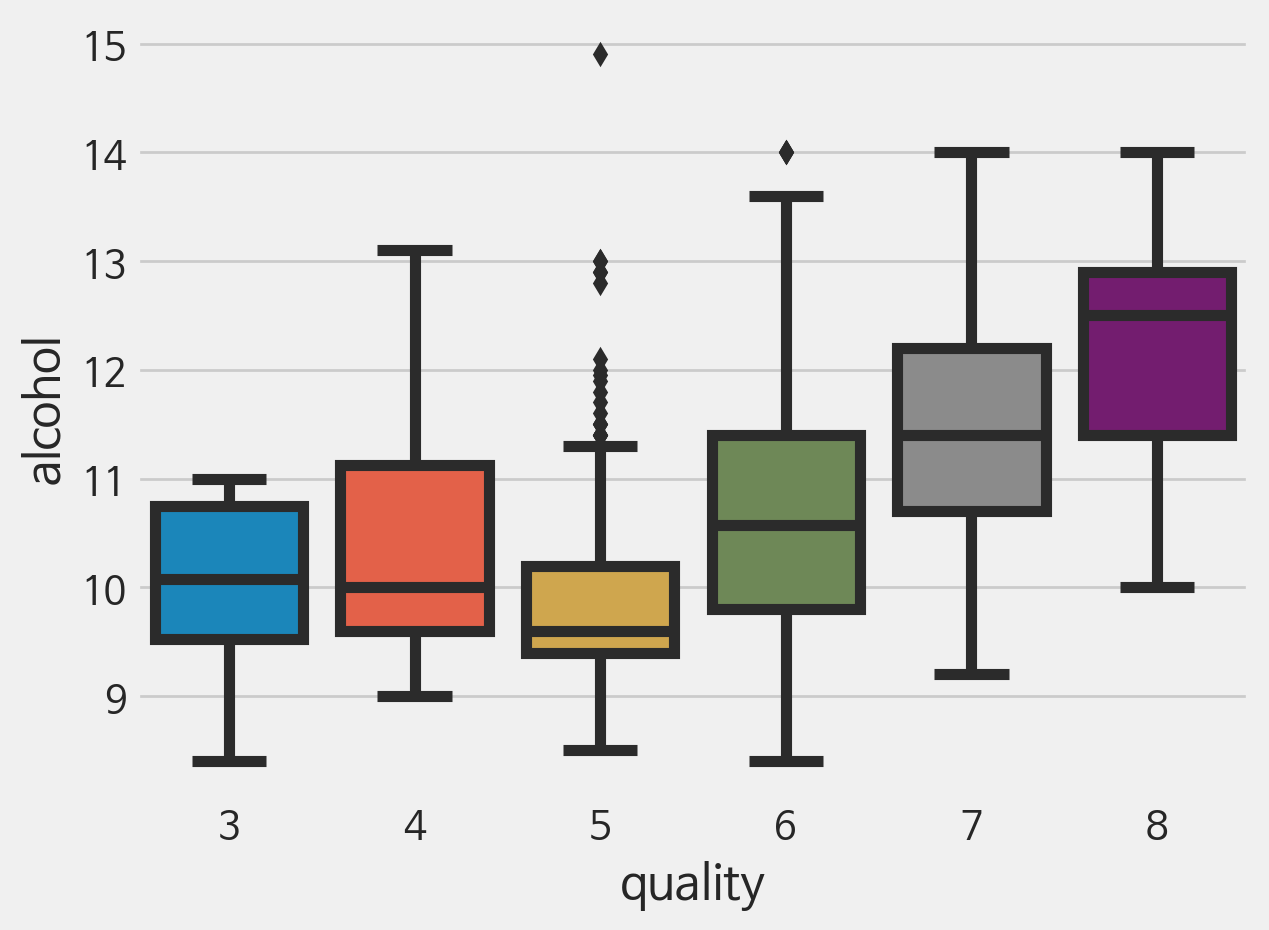

In [76]:
sns.boxplot(data=df_number, x=args.target_col, y='alcohol')

### 범주형 데이터

In [37]:
# df_object = data.describe(exclude=np.number)
# df_object.shape

In [38]:
# df_object.describe()

# ModelV1

## Feature Extraction

In [77]:
def add_Reviews(quality):
    reviews = None
    if quality <=3:
        reviews = '1'
    elif quality <=7:
        reviews = '2'
    elif quality >=8:
        reviews = '3'

    return reviews

In [78]:
train['Reviews'] = train[args.target_col].map(add_Reviews)
test['Reviews'] = test[args.target_col].map(add_Reviews)

train['Reviews'].isnull().sum(), test['Reviews'].isnull().sum()

(0, 0)

### Split Feature and Target

In [79]:
train.shape, test.shape

((1060, 13), (384, 13))

## Feature Engineering

### Feature scaling or normalization

In [11]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)

### Data reduction
- 변수별 상관관계를 분석하여 비슷한 설명변수들을 제거
- 주성분 분석과 같은 차원 축소 기술들을 이용할 수도 있음

### Discretization
- 연속형 변수를 범주형 변수로 변경을 하면, 모델이 학습을 할 때, overfitting을 줄일 수 있습니다.

### Feature encoding

## Modeling

## Evaluation